In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset
In this homework, we will use the California Housing Prices. You can take it from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

## EDA
* Load the data.
* Look at the median_house_value variable. Does it have a long tail?

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:>

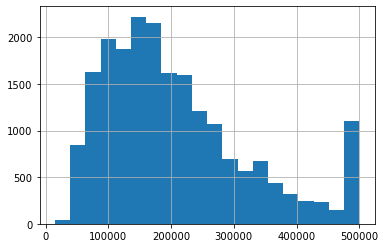

In [5]:
df.median_house_value.hist(bins=20)

The Data doesn't have long tail, but positively skewed

## Features
For the rest of the homework, you'll need to use only these columns:
* 'latitude',
* 'longitude',
* 'housing_median_age',
* 'total_rooms',
* 'total_bedrooms',
* 'population',
* 'households',
* 'median_income',
* 'median_house_value'

Select only them.

In [6]:
columns_used = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

df_house = df[columns_used]

In [7]:
df_house.shape

(20640, 9)

## Question 1
**Find a feature with missing values. How many missing values does it have?**

In [8]:
df_house.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**only have 207 missing values in total_bedrooms column**

## Question 2
**What's the median (50% percentile) for variable 'population'?**

In [12]:
df_house.population.quantile(0.5)

1166.0

**Median/50% percentile of the 'population' column is 1166.0**

## Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [15]:
# Splitting of dataset into the train, validation, and the test dataset 
n = len(df_house)

# Validation dataset
n_val = int(n * 0.2)

# Test dataset 
n_test = int(n * 0.2)

# Train dataset
n_train = n - n_val - n_test

In [19]:
n_train, n_val, n_test

(12384, 4128, 4128)

In [26]:
df_train = df_house.iloc[:n_train]
df_val = df_house.iloc[n_train:n_train+n_val]
df_test = df_house.iloc[n_train+n_val:]

len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [27]:
# Gives an array from 0 to the specified number itself. This will help in what we're trying to do.
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [28]:
# We're shuffling the indexes so that we are able to get random datapoints out of the dataset 
# This is so that we are able to reduce any bias by any previous points
np.random.seed(42)
np.random.shuffle(idx)

In [29]:
# split train, val, test using shuffled indexes
df_train = df_house.iloc[idx[:n_train]]
df_val = df_house.iloc[idx[n_train:n_train+n_val]]
df_test = df_house.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [31]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [32]:
# As seen above, the index of the train data is mixed up, so let's reset the index back to 0 - 7150.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [33]:
# Transformation of the y values
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [34]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [35]:
len(y_train)

12384

## Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [41]:
print(df_train.isnull().sum().sum())
print(df_val.isnull().sum().sum())
print(df_test.isnull().sum().sum())

207
0
0


Missing values is only in df_train

In [45]:
# Impute Missing Values with zero, mean, and median
df_train_zero = df_train.fillna(0).values
df_train_mean = df_train.fillna(df_train.mean()).values
df_train_median = df_train.fillna(df_train.median()).values

In [52]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### FIll Missing Value with 0 and Train Linear Regression

In [49]:
# Train Linear Regression and make prediction
w0, w = train_linear_regression(df_train_zero, y_train)
y_pred = w0 + df_train_zero.dot(w)

print(w0)
print(w)

-11.686975241911805
[-2.82087184e-01 -2.76255120e-01  2.91329621e-03 -8.64531514e-06
  1.50811922e-04 -2.08205659e-04  5.69546573e-04  1.71308139e-01]


<AxesSubplot:ylabel='Count'>

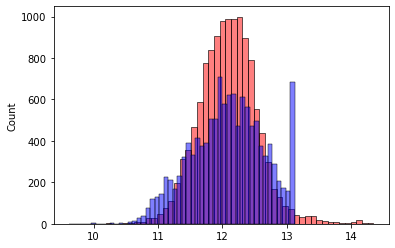

In [53]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [51]:
rmse(y_train, y_pred)

0.3413135910156676

### FIll Missing Value with mean of variable and Train Linear Regression

In [56]:
# Train Linear Regression and make prediction
w0, w = train_linear_regression(df_train_mean, y_train)
y_pred = w0 + df_train_zero.dot(w)

print(w0)
print(w)

-11.759590872658137
[-2.82182103e-01 -2.76809637e-01  2.93033801e-03 -1.48543785e-05
  2.48054046e-04 -2.03763456e-04  4.87004092e-04  1.73086593e-01]


<AxesSubplot:ylabel='Count'>

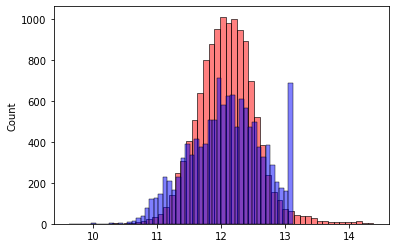

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [58]:
rmse(y_train, y_pred)

0.3414924555124645

### FIll Missing Value with median of variable and Train Linear Regression

In [59]:
# Train Linear Regression and make prediction
w0, w = train_linear_regression(df_train_mean, y_train)
y_pred = w0 + df_train_zero.dot(w)

print(w0)
print(w)

-11.759590872658137
[-2.82182103e-01 -2.76809637e-01  2.93033801e-03 -1.48543785e-05
  2.48054046e-04 -2.03763456e-04  4.87004092e-04  1.73086593e-01]


<AxesSubplot:ylabel='Count'>

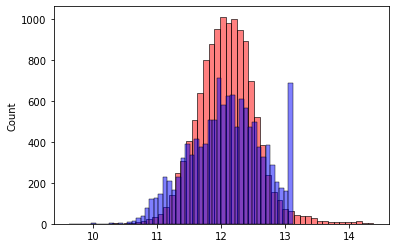

In [60]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [61]:
rmse(y_train, y_pred)

0.3414924555124645

* fill with 0 gives RMSE 0.34131
* fill with mean gives RMSE 0.34149
* fill with median gives RMSE 0.34149

both are equally good

## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

In [64]:
# implement the regularization into our linear regression
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [68]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    w0, w = train_linear_regression_reg(df_train_zero, y_train, r=r)

    y_pred = w0 + df_val.dot(w)
    print(r, rmse(y_val, y_pred))

0 0.3295330365231343
1e-06 0.3295330361647732
0.0001 0.32953300097040683
0.001 0.3295327038672534
0.01 0.32953193659894736
0.1 0.32969472053996784
1 0.33378872200041415
5 0.339248534550426
10 0.3406063807808404


r = 0.01 gives best RMSE results

## Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [81]:
rmse_val = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Gives an array from 0 to the specified number itself. This will help in what we're trying to do.
    idx = np.arange(n)

    # We're shuffling the indexes so that we are able to get random datapoints out of the dataset 
    # This is so that we are able to reduce any bias by any previous points
    np.random.seed(s)
    np.random.shuffle(idx)

    # split train, val, test using shuffled indexes
    df_train = df_house.iloc[idx[:n_train]]
    df_val = df_house.iloc[idx[n_train:n_train+n_val]]
    df_test = df_house.iloc[idx[n_train+n_val:]]
    
    # As seen above, the index of the train data is mixed up, so let's reset the index back to 0 - 7150.
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Transformation of the y values
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    df_train_zero = df_train.fillna(0).values

    w0, w = train_linear_regression(df_train_zero, y_train)
    y_pred = w0 + df_val.dot(w)
    rmse_val.append(rmse(y_val, y_pred))
    print(s, rmse(y_val, y_pred))

print(rmse_val)

0 0.3387287407762002
1 0.33551437805858536
2 0.33213227227036274
3 0.3397305674386428
4 0.3391520420611582
5 0.3440745101800429
6 0.34553037059127156
7 0.3382900657537346
8 0.34652233089140494
9 0.336439666279061
[0.3387287407762002, 0.33551437805858536, 0.33213227227036274, 0.3397305674386428, 0.3391520420611582, 0.3440745101800429, 0.34553037059127156, 0.3382900657537346, 0.34652233089140494, 0.336439666279061]


In [82]:
round(np.std(rmse_val),3)

0.004

## Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [84]:
# Gives an array from 0 to the specified number itself. This will help in what we're trying to do.
idx = np.arange(n)

# We're shuffling the indexes so that we are able to get random datapoints out of the dataset 
# This is so that we are able to reduce any bias by any previous points
np.random.seed(9)
np.random.shuffle(idx)

# split train, val, test using shuffled indexes
df_train_val = df_house.iloc[idx[:n_train+n_val]]
df_test = df_house.iloc[idx[n_train+n_val:]]

 # As seen above, the index of the train data is mixed up, so let's reset the index back to 0 - 7150.
df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Transformation of the y values
y_train_val = np.log1p(df_train_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train_val['median_house_value']
del df_test['median_house_value']

df_train_val_zero = df_train_val.fillna(0).values

w0, w = train_linear_regression_reg(df_train_val_zero, y_train_val, r=0.001)
y_pred = w0 + df_test.dot(w)
print(rmse(y_test, y_pred))

0.345160085289811
